# Hierarchical Models

Human knowledge is arranged hierarchically. The more organized the knowledge is more easy it is for us to retrieve and 
infer . Here we will look into an example of building an hierarchical model. In hierarchical model the distribution is present in each level. Based on the decisions of the distribution of the higher level affect the lower levels. The below example is taken from https://probmods.org/hierarchical-models.html


## Bag of Marbles

There are several bags of marbles each containing some colors of marbles. Marbles are drawn at random from each bags. We need to predict the distribution of the marbles in each bags 

Hierarchical Models can be used to model this problem. 
Kemp et. al (2007) hierarchical model for Bag of Marbles

$\beta = <1,1,1,1,1>$ 

$\theta|\beta \sim Dirichlet(\beta) $

$y|\theta \sim Multinomial(\theta)$

The graphical model of the model can be drawn as below
![Hierarchical Model](images/hierarchicalmodel.png)

# Sample Set Generation

In [1]:
# Some constatnts we will be using 

n_colors = 5 #Number of colors in each bag
n_bags = 3 # Number of bags
n_trials = 10

In [2]:
from bayespy import nodes
import numpy as np

beta = 1e-1 * np.ones(n_colors)
#Generate some random distributions for the color distribution inside each bags
p_color = nodes.Dirichlet(beta,
                          plates = (n_bags,)).random()

#The marbles drawn based on the distribution for 10 trials
draw_marbles = nodes.Multinomial(n_trials,
                                 p_color).random()
#draw_marbles = nodes.Categorical(p_color,plates=(10,n_bags)).random()
draw_marbles

array([[ 0,  0,  0,  0, 10],
       [ 0,  0,  0, 10,  0],
       [ 3,  0,  0,  0,  7]])

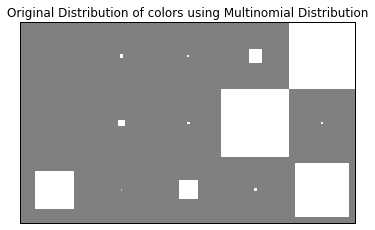

In [3]:
%matplotlib inline
import bayespy.plot as bpplt
#bpplt.pdf(p_theta.pdf, np.linspace(-10, 20, num=100), color='k', name=r'\mu')
bpplt.hinton(p_color)
bpplt.pyplot.title("Original Distribution of colors using Multinomial Distribution")
bpplt.pyplot.show()

# Model

In [4]:
from bayespy import nodes
import numpy as np

p_theta = nodes.Dirichlet(np.ones(n_colors),
                          plates=(n_bags,),
                          name='p_theta')

bag_model = nodes.Multinomial(n_trials,
                        p_theta,
                        name='bag_model')
bag_model.plates

(3,)

In [5]:
bag_model.observe(draw_marbles)

# Performing Inference

In [6]:
from bayespy.inference import VB
Q = VB(bag_model, p_theta)

In [7]:
Q.update(repeat=1000)

Iteration 1: loglike=-2.072626e+01 (0.000 seconds)
Iteration 2: loglike=-2.072626e+01 (0.000 seconds)
Converged at iteration 2.


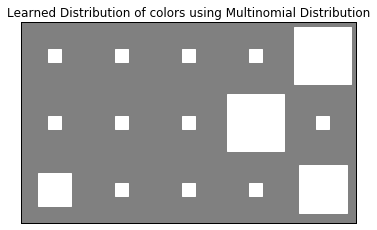

In [8]:
%matplotlib inline
import bayespy.plot as bpplt
#bpplt.pdf(p_theta.pdf, np.linspace(-10, 20, num=100), color='k', name=r'\mu')
bpplt.hinton(p_theta)
bpplt.pyplot.title("Learned Distribution of colors using Multinomial Distribution")
bpplt.pyplot.show()

# Using Categorical Distribution

The same problem can be solved with categorical distirbution. Categorical distribution is similar to the Multinomical distribution expect for the output it produces.

Multinomial and Categorical infer the number of colors from the size of the probability vector (p_theta)
Categorical data is in a form where the value tells the index of the color that was picked in a trial. so if n_colors=5, Categorical data could be [4, 4, 0, 1, 1, 2, 4] if the number of trials was 7. 

multinomial data is such that you have a vector where each element tells how many times that color was picked, for instance, [3, 0, 4] if you have 7 trials.

So there is significant difference in Multinomial and Categorical data . Depending on the data you have the choice of the Distribution has to be made.

Now we can see an example of Hierarchical model usign categorical data generator and model

In [9]:
# Some constatnts we will be using 

n_colors = 5 #Number of colors in each bag
n_bags = 3 # Number of bags
n_trials = 10

In [10]:
from bayespy import nodes
import numpy as np

#The marbles drawn based on the distribution for 10 trials
# Using same p_color distribution as in the above example
draw_marbles = nodes.Categorical(p_color,
                                 plates=(n_trials, n_bags)).random()
draw_marbles

array([[4, 3, 4],
       [4, 3, 0],
       [4, 3, 0],
       [4, 3, 0],
       [4, 3, 0],
       [4, 3, 4],
       [4, 3, 4],
       [4, 3, 0],
       [4, 3, 0],
       [4, 3, 4]])

# Model with Categorical Distribution

In [11]:
from bayespy import nodes
import numpy as np

p_theta = nodes.Dirichlet(np.ones(n_colors),
                          plates=(n_bags,),
                          name='p_theta')

bag_model = nodes.Categorical(p_theta,
                        plates=(n_trials, n_bags),
                        name='bag_model')
bag_model.plates

(10, 3)

# Observing the data

In [12]:
bag_model.observe(draw_marbles)

# Inference

In [13]:
from bayespy.inference import VB
Q = VB(bag_model, p_theta)

In [14]:
Q.update(repeat=1000)

Iteration 1: loglike=-2.607337e+01 (0.000 seconds)
Iteration 2: loglike=-2.607337e+01 (0.000 seconds)
Converged at iteration 2.


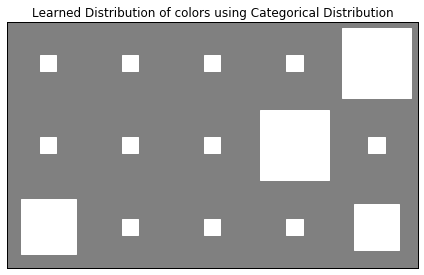

In [15]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p_theta)
bpplt.pyplot.tight_layout()
bpplt.pyplot.title("Learned Distribution of colors using Categorical Distribution")
bpplt.pyplot.show()

# Hierarchical Model 

In [34]:
from bayespy.nodes import DirichletConcentration

from bayespy import nodes
import numpy as np

p_conc = DirichletConcentration(n_colors)
p_conc.initialize_from_value(np.ones(n_colors))
p_theta = nodes.Dirichlet(p_conc,
                          plates=(n_bags,),
                          name='p_theta')

bag_model = nodes.Categorical(p_theta,
                        plates=(n_trials, n_bags),
                        name='bag_model')
bag_model.plates

(10, 3)

In [35]:
print(p_theta.get_parameters())
print(p_conc.get_moments())

[array([[ 1.,  1.,  1.,  1.,  1.]])]
[array([ 1.,  1.,  1.,  1.,  1.]), 3.1780538303479458]


In [36]:
bag_model.observe(draw_marbles)
Q = VB(bag_model, p_theta, p_conc)
Q.update(repeat=1000)

Iteration 1: loglike=-2.328490e+01 (0.010 seconds)
Iteration 2: loglike=-1.963016e+01 (0.000 seconds)
Iteration 3: loglike=-1.770218e+01 (0.010 seconds)
Iteration 4: loglike=-1.651061e+01 (0.000 seconds)
Iteration 5: loglike=-1.571798e+01 (0.010 seconds)
Iteration 6: loglike=-1.516744e+01 (0.000 seconds)
Iteration 7: loglike=-1.477132e+01 (0.000 seconds)
Iteration 8: loglike=-1.447727e+01 (0.010 seconds)
Iteration 9: loglike=-1.425291e+01 (0.000 seconds)
Iteration 10: loglike=-1.407758e+01 (0.010 seconds)
Iteration 11: loglike=-1.393768e+01 (0.000 seconds)
Iteration 12: loglike=-1.382402e+01 (0.010 seconds)
Iteration 13: loglike=-1.373023e+01 (0.000 seconds)
Iteration 14: loglike=-1.365177e+01 (0.010 seconds)
Iteration 15: loglike=-1.358533e+01 (0.000 seconds)
Iteration 16: loglike=-1.352847e+01 (0.010 seconds)
Iteration 17: loglike=-1.347936e+01 (0.000 seconds)
Iteration 18: loglike=-1.343657e+01 (0.000 seconds)
Iteration 19: loglike=-1.339901e+01 (0.010 seconds)
Iteration 20: loglike

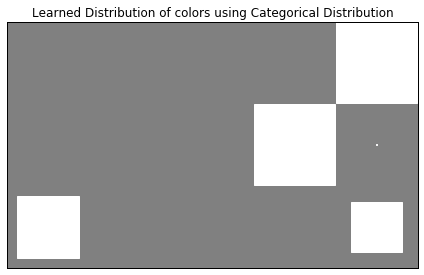

In [28]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p_theta)
bpplt.pyplot.tight_layout()
bpplt.pyplot.title("Learned Distribution of colors using Categorical Distribution")
bpplt.pyplot.show()

In [37]:
print(p_theta.get_parameters())
print(p_conc.get_moments())

[array([[  5.81114891e-02,   7.14805380e-04,   7.14805380e-04,
          5.99890749e-02,   1.01324687e+01],
       [  5.81114891e-02,   7.14805380e-04,   7.14805380e-04,
          1.00599891e+01,   1.32468689e-01],
       [  6.05811149e+00,   7.14805380e-04,   7.14805380e-04,
          5.99890749e-02,   4.13246869e+00]])]
[array([ 0.05810598,  0.00071151,  0.00071151,  0.05998321,  0.13245479]), -20.770895293517469]
